In [1]:
pip install pandas numpy scikit-learn xgboost imbalanced-learn matplotlib seaborn joblib


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
     ------------ ------------------------- 20.5/61.0 kB 217.9 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/61.0 kB 279.3 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 360.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.2/72.0 MB 5.3 MB/s eta 0:00:14
   ---------------------------------------- 0.2/72.0 MB 3.4 MB/s eta 0:00:22
   ---------------------------------------- 0.5/72.0 MB 3.5 MB/s eta 0:00:21
   ---------------------------------------- 0.5/72.0 MB 3.4 MB/s eta 0:00:21
   ---------------------------------------- 0.7/72.0 MB 3.1 MB/s eta 0:00:23
    --------------------------------------- 1.0/72.0 MB 3.6 MB/s eta 0:00:20
    -

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
tensorflow 2.20.0 requires protobuf>=5.28.0, but you have protobuf 4.25.8 which is incompatible.


In [5]:
import pandas as pd

data = pd.read_csv(r'C:\Users\DELL\Documents\Customer_Churn_Project\telco_churn.csv')





In [6]:
data.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data = data.dropna()


In [8]:
data = data.drop_duplicates()


<Axes: xlabel='Churn', ylabel='count'>

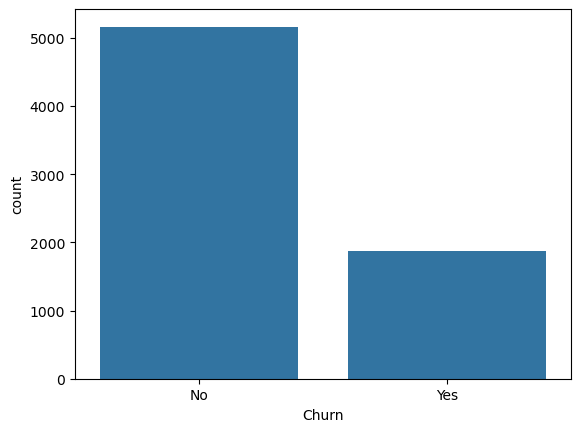

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=data)


<Axes: xlabel='Contract', ylabel='count'>

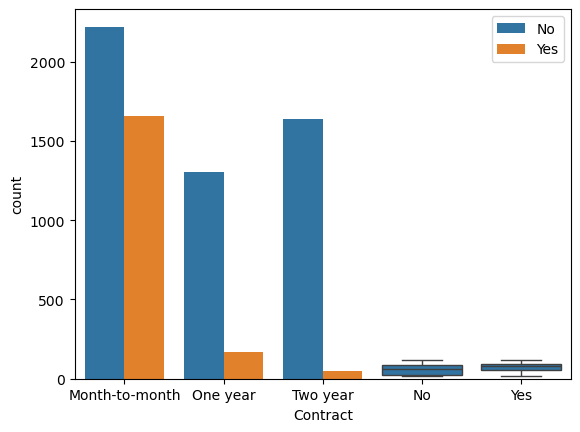

In [10]:
sns.countplot(x='Contract', hue='Churn', data=data)
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)


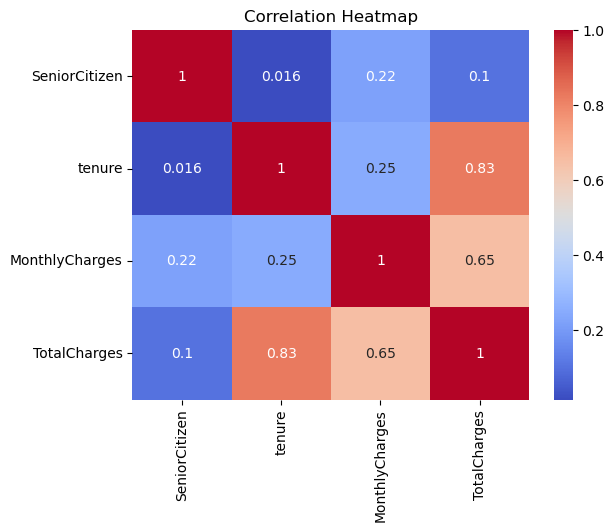

In [12]:
numeric_data = data.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [13]:
data = pd.get_dummies(data, drop_first=True)


In [14]:
data['AvgMonthlyCharges'] = data['TotalCharges']/data['tenure']


In [15]:
X = data.drop('Churn_Yes', axis=1)
y = data['Churn_Yes']


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [20]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

lr.fit(X_train, y_train)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [22]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.7862559241706161
Recall: 0.4741532976827095
F1 Score: 0.5412004069175992


In [23]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [26]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [27]:
from sklearn.metrics import accuracy_score, recall_score, f1_score
y_pred = xgb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.7668246445497631
Recall: 0.49554367201426025
F1 Score: 0.5305343511450382


In [28]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))


[[1340  209]
 [ 283  278]]


In [29]:
import joblib
joblib.dump(xgb_model, 'xgb_model.joblib')
joblib.dump(X.columns, 'model_columns.joblib')


['model_columns.joblib']

In [31]:
import pandas as pd
import joblib

# Load model and columns
model = joblib.load('xgb_model.joblib')
columns = joblib.load('model_columns.joblib')

# Create input data (partial features only)
input_data = pd.DataFrame({
    'tenure': [12],
    'MonthlyCharges': [70],
    'TotalCharges': [840],
    'Contract_Month-to-month': [1],
    'Contract_One year': [0],
    'Contract_Two year': [0]
})

# 🔑 IMPORTANT STEP (fixes KeyError)
input_data = input_data.reindex(columns=columns, fill_value=0)

# Predict
prediction = model.predict(input_data)[0]
probability = model.predict_proba(input_data)[0][1]

print("Prediction:", prediction)
print("Churn Probability:", round(probability, 3))


Prediction: 0
Churn Probability: 0.028
